In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import gc
warnings.simplefilter('ignore')
matplotlib.rcParams['figure.dpi'] = 100
sns.set()
%matplotlib inline

In [2]:
building = pd.read_csv('./data/building_metadata.csv')
weather_train = pd.read_csv('./data/weather_train.csv')
weather_test = pd.read_csv('./data/weather_test.csv')
train = pd.read_csv('./data/train.csv')
test = pd.read_csv('./data/test.csv')

In [3]:
train = train.merge(building, on='building_id', how='left')
test = test.merge(building, on='building_id', how='left')

train = train.merge(weather_train, on=['site_id', 'timestamp'], how='left')
test = test.merge(weather_test, on=['site_id', 'timestamp'], how='left')
del weather_train, weather_test,building
gc.collect()

24

In [4]:
# Saving some memory
d_types = {'building_id': np.int16,
          'meter': np.int8,
          'site_id': np.int8,
          'primary_use': 'category',
          'square_feet': np.int32,
          'year_built': np.float16,
          'floor_count': np.float16,
          'air_temperature': np.float32,
          'cloud_coverage': np.float16,
          'dew_temperature': np.float32,
          'precip_depth_1_hr': np.float16,
          'sea_level_pressure': np.float32,
          'wind_direction': np.float16,
          'wind_speed': np.float32}

for feature in d_types:
    train[feature] = train[feature].astype(d_types[feature])
    test[feature] = test[feature].astype(d_types[feature])
    
train["timestamp"] = pd.to_datetime(train["timestamp"])
test["timestamp"] = pd.to_datetime(test["timestamp"])
gc.collect();

In [5]:
train

,building_id,meter,timestamp,meter_reading,site_id,primary_use,square_feet,year_built,floor_count,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,0,0,2016-01-01 00:00:00,0.000,0,Education,7432,2008.0,NaN,25.0,6.0,20.0,NaN,1019.700012,0.0,0.0
1,1,0,2016-01-01 00:00:00,0.000,0,Education,2720,2004.0,NaN,25.0,6.0,20.0,NaN,1019.700012,0.0,0.0
2,2,0,2016-01-01 00:00:00,0.000,0,Education,5376,1991.0,NaN,25.0,6.0,20.0,NaN,1019.700012,0.0,0.0
3,3,0,2016-01-01 00:00:00,0.000,0,Education,23685,2002.0,NaN,25.0,6.0,20.0,NaN,1019.700012,0.0,0.0
4,4,0,2016-01-01 00:00:00,0.000,0,Education,116607,1975.0,NaN,25.0,6.0,20.0,NaN,1019.700012,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20216095,1444,0,2016-12-31 23:00:00,8.750,15,Entertainment/public assembly,19619,1914.0,NaN,1.7,NaN,-5.6,-1.0,1008.500000,180.0,8.8
20216096,1445,0,2016-12-31 23:00:00,4.825,15,Education,4298,NaN,NaN,1.7,NaN,-5.6,-1.0,1008.500000,180.0,8.8
20216097,1446,0,2016-12-31 23:00:00,0.000,15,Entertainment/public assembly,11265,1997.0,NaN,1.7,NaN,-5.6,-1.0,1008.500000,180.0,8.8
20216098,1447,0,2016-12-31 23:00:00,159.575,15,Lodging/residential,29775,2001.0,NaN,1.7,NaN,-5.6,-1.0,1008.500000,180.0,8.8


In [6]:
font_location = './data/NanumBarunGothic.ttf'

In [7]:
matplotlib.font_manager._rebuild()

In [8]:
import matplotlib.font_manager as fm
font_name = fm.FontProperties(fname=font_location).get_name()
matplotlib.rc('font', family=font_name)

In [9]:
fontprop = fm.FontProperties(fname=font_location, size=18)

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


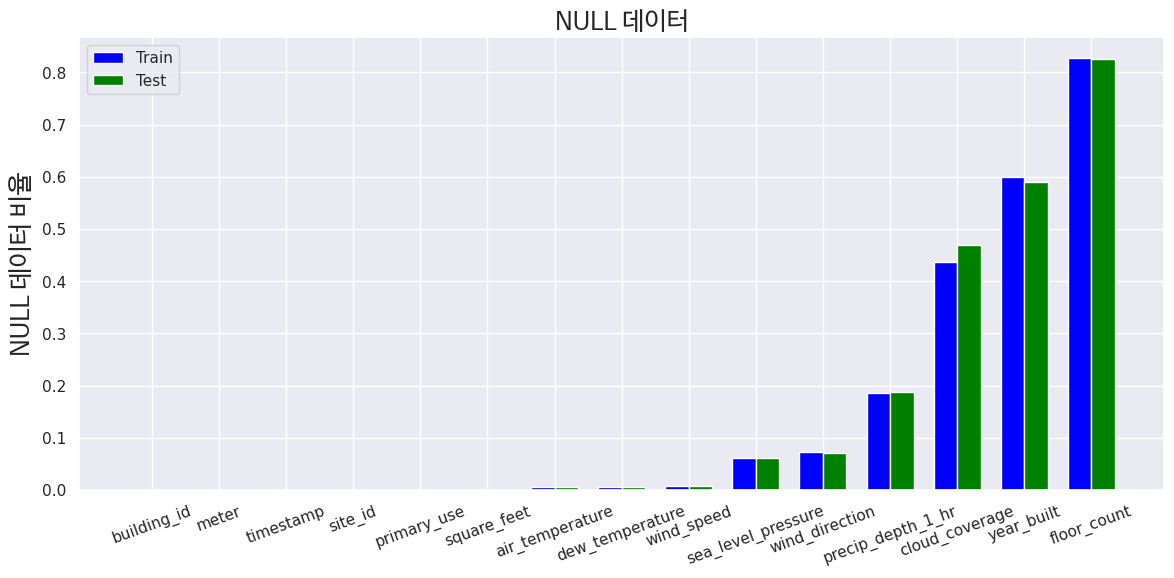

In [10]:
train_data = (train.isnull().sum() / len(train)).drop('meter_reading').sort_values().values
ind = np.arange(len(train_data))
# NULL 데이터 오름차순 정렬

width = 0.35

fig, axes = plt.subplots(1,1,figsize=(14, 6), dpi=100)
plt.style.use('fast')
tr = axes.bar(ind, train_data, width, color='blue')

test_data = (test.isnull().sum() / len(test)).drop('row_id').sort_values().values
tt = axes.bar(ind+width, test_data, width, color='green')

plt.style.use('fast')
axes.set_title('NULL 데이터', fontsize=18, fontproperties=fontprop)
axes.set_ylabel('NULL 데이터 비율', fontproperties=fontprop)
axes.set_xticks(ind + width / 2)
axes.set_xticklabels((train.isnull().sum() / len(train)).drop('meter_reading').sort_values().index, rotation=20)
axes.legend([tr, tt], ['Train', 'Test']);

In [11]:
(train.isnull().sum() / len(train)).sort_values(ascending=False)

floor_count           0.826528
year_built            0.599900
cloud_coverage        0.436551
precip_depth_1_hr     0.185447
wind_direction        0.071678
sea_level_pressure    0.060925
wind_speed            0.007107
dew_temperature       0.004953
air_temperature       0.004781
square_feet           0.000000
primary_use           0.000000
site_id               0.000000
meter_reading         0.000000
timestamp             0.000000
meter                 0.000000
building_id           0.000000
dtype: float64

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


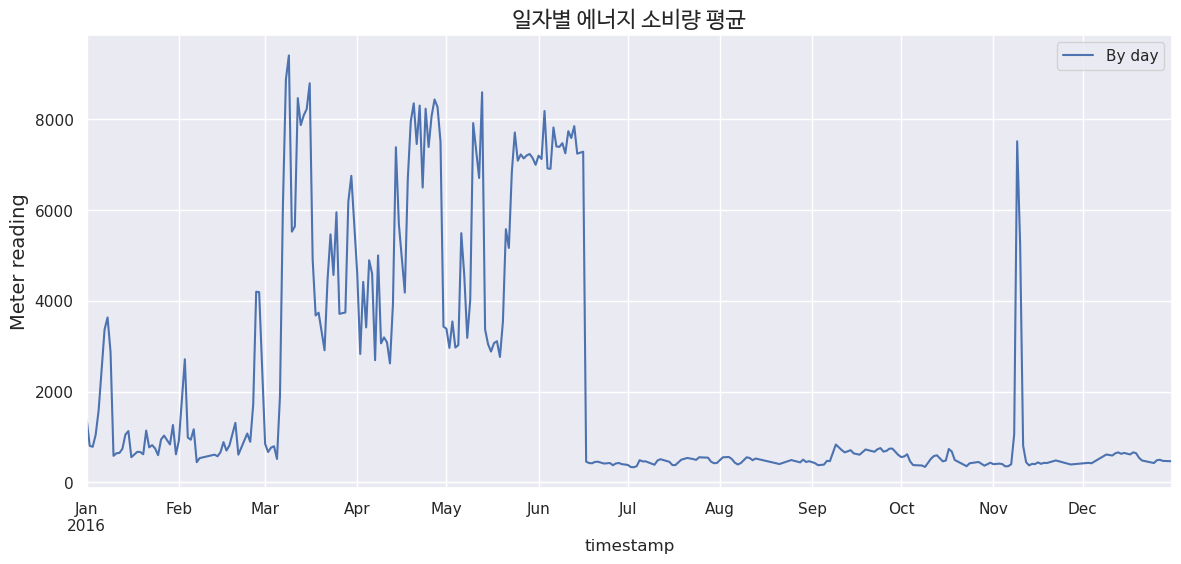

In [12]:
fig, axes = plt.subplots(1, 1, figsize=(14, 6), dpi=100)
train[['timestamp', 'meter_reading']].set_index('timestamp').resample('D').mean()['meter_reading'].plot(ax=axes, label='By day', alpha=1).set_ylabel('Meter reading', fontsize=14);
axes.set_title('일자별 에너지 소비량 평균', fontsize=16,  fontproperties=fontprop)
axes.legend();

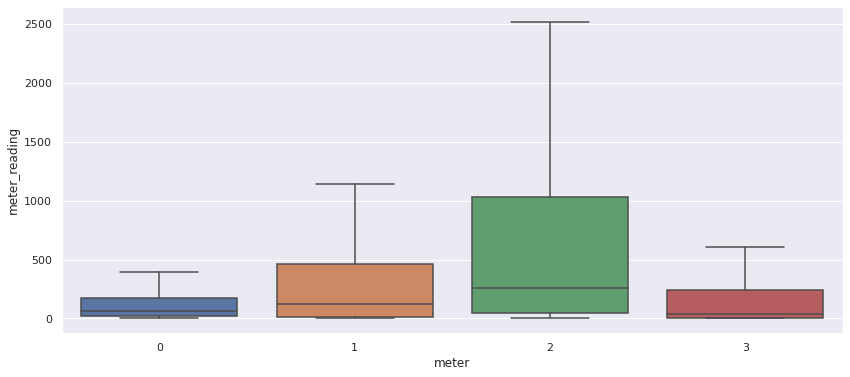

In [13]:
fig, axes = plt.subplots(1, 1, figsize=(14, 6))
sns.boxplot(x='meter', y='meter_reading', data=train, showfliers=False);

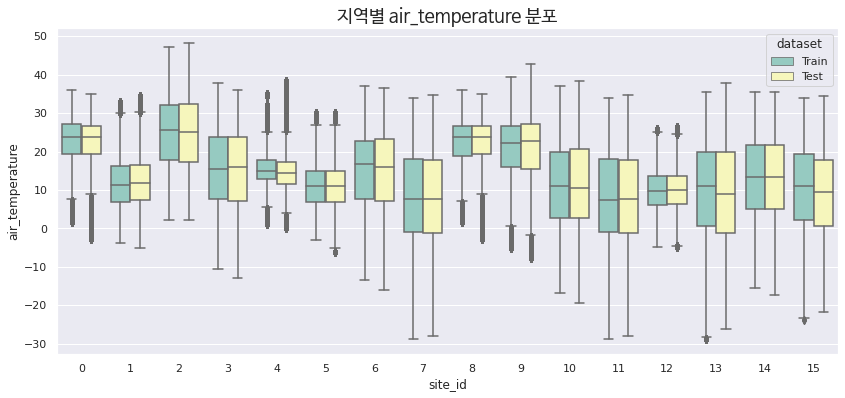

In [14]:
tmp_df = pd.concat([train[['site_id', 'air_temperature']], test[['site_id', 'air_temperature']]], ignore_index=True)
tmp_df['dataset'] = 'Train'
tmp_df.loc[tmp_df.index > len(train), 'dataset'] = 'Test'

fig, axes = plt.subplots(1, 1, figsize=(14, 6))
sns.boxplot(x='site_id', y='air_temperature', data=tmp_df, hue='dataset', palette="Set3");
axes.set_title('지역별 air_temperature 분포',  fontproperties=fontprop)

del tmp_df
gc.collect();

Text(0.5, 1.0, 'square_feet 데이터 분포')

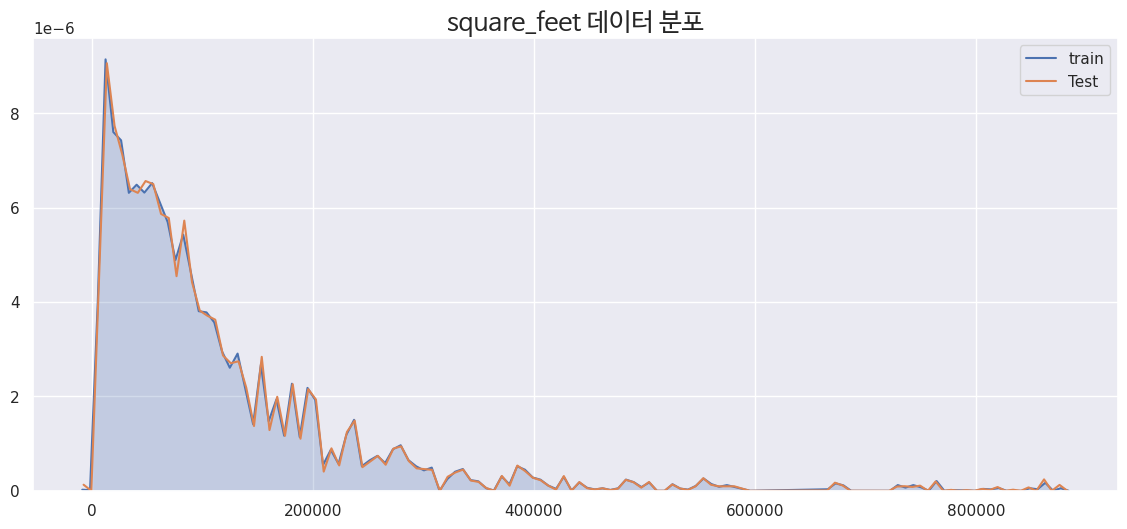

In [15]:
fig, axes = plt.subplots(1, 1, figsize=(14, 6), dpi=100)
sns.kdeplot(train['square_feet'], shade=True, label='train');
sns.kdeplot(test['square_feet'], label='Test');
axes.set_title('square_feet 데이터 분포',  fontproperties=fontprop)

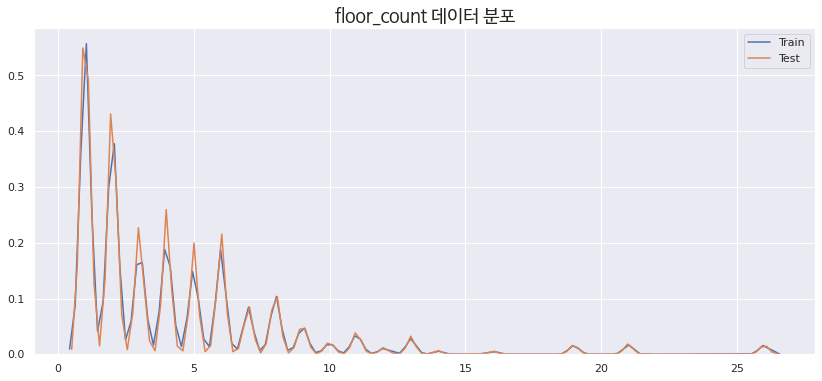

In [16]:
fig, axes = plt.subplots(1, 1, figsize=(14, 6))
sns.kdeplot(train['floor_count'], label='Train', ax=axes);
sns.kdeplot(test['floor_count'], label='Test', ax=axes);
test.index += len(train)
test.index -= len(train)
axes.set_title('floor_count 데이터 분포',  fontproperties=fontprop)
gc.collect();

In [17]:
train['year_built']

0           2008.0
1           2004.0
2           1991.0
3           2002.0
4           1975.0
             ...  
20216095    1914.0
20216096       NaN
20216097    1997.0
20216098    2001.0
20216099    2001.0
Name: year_built, Length: 20216100, dtype: float16

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


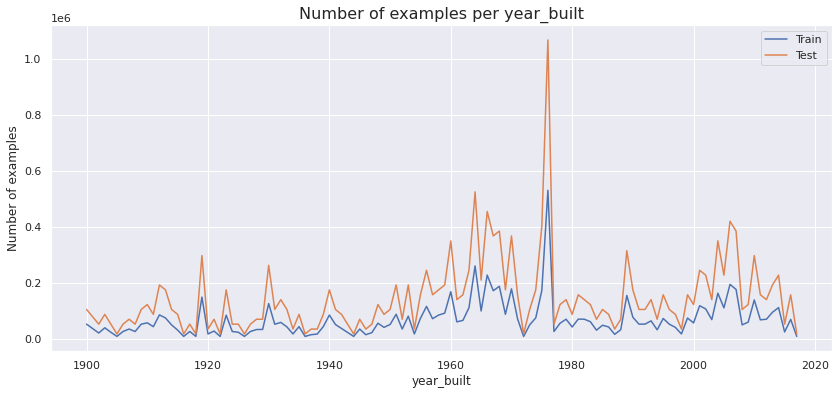

In [18]:
fig, axes = plt.subplots(1,1,figsize=(14, 6))
train['year_built'].value_counts(dropna=False).sort_index().plot(ax=axes).set_xlabel('year_built');
test['year_built'].value_counts(dropna=False).sort_index().plot(ax=axes).set_ylabel('Number of examples');
axes.legend(['Train', 'Test']);
axes.set_title('Number of examples per year_built', fontsize=16);

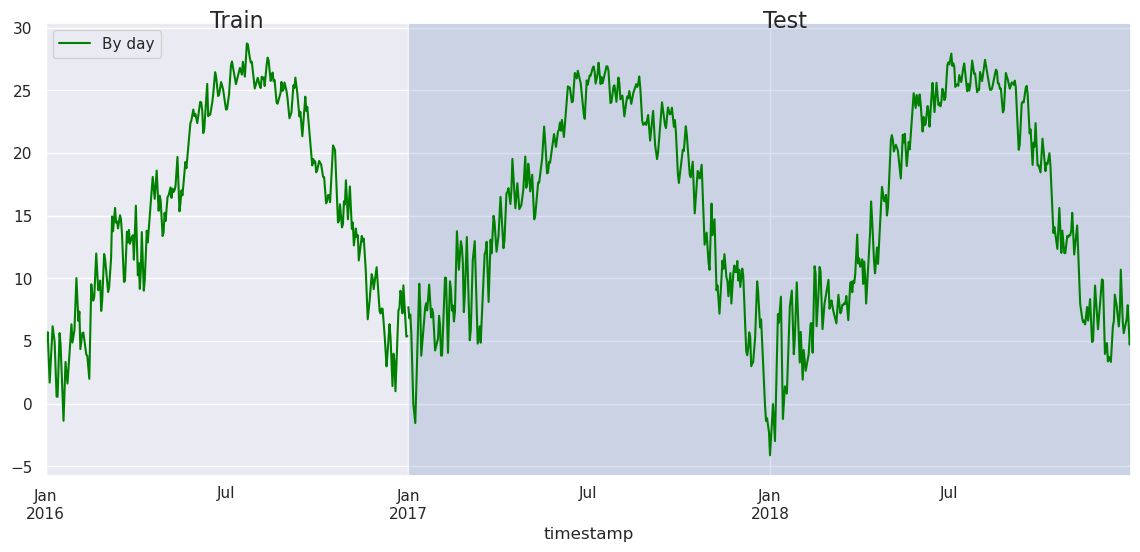

In [19]:
fig, axes = plt.subplots(1,1,figsize=(14, 6), dpi=100)
train[['timestamp', 'air_temperature']].set_index('timestamp').resample('D').mean()['air_temperature'].plot(ax=axes, alpha=1, color='green',  label='By day');
test[['timestamp', 'air_temperature']].set_index('timestamp').resample('D').mean()['air_temperature'].plot(ax=axes, alpha=1,color='green',  label='');
axes.legend();
axes.text(train['timestamp'].iloc[9000000], 30, 'Train', fontsize=16);
axes.text(test['timestamp'].iloc[29400000], 30, 'Test', fontsize=16);
axes.axvspan(test['timestamp'].min(), test['timestamp'].max(),  alpha=0.2);

In [20]:
train['weekday'] = train['timestamp'].dt.weekday
test['weekday'] = test['timestamp'].dt.weekday

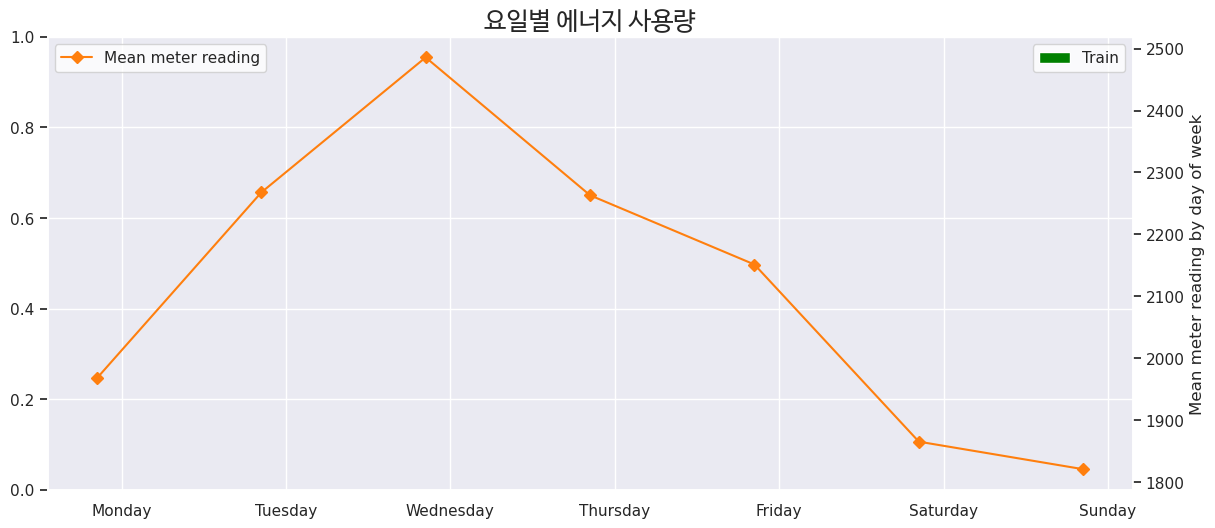

In [21]:
train_data = train['weekday'].value_counts(dropna=False, normalize=True).sort_index().values
ind = np.arange(len(train_data))
width = 0.3

fig, axes = plt.subplots(1,1,figsize=(14, 6), dpi=100)

axes.set_xticks(ind + width / 2)
axes2 = axes.twinx()
mr = axes2.plot(ind, train[['weekday', 'meter_reading']].groupby('weekday')['meter_reading'].mean().sort_index().values, 'D-', color='tab:orange', label='Mean meter reading');
axes2.grid(False);
axes2.tick_params(axis='y');
axes2.set_ylabel('Mean meter reading by day of week');
axes.legend([ tt], ['Train'], facecolor='white');
axes2.legend(loc=2, facecolor='white');

axes.set_title('요일별 에너지 사용량',  fontproperties=fontprop)
axes.set_xticklabels(train['weekday'].value_counts().sort_index().index.map({0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}), rotation=0);